In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [2]:
# Read Data Related to Day Wise
df = pd.read_csv("covid_19_india.csv") 
df.head()

,Sno,Date,Time,State,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/2020,6:00 pm,Kerala,1,0,0,0,1
1,2,31/01/2020,6:00 pm,Kerala,1,0,0,0,1
2,3,01/02/2020,6:00 pm,Kerala,2,0,0,0,2
3,4,02/02/2020,6:00 pm,Kerala,3,0,0,0,3
4,5,03/02/2020,6:00 pm,Kerala,3,0,0,0,3


In [3]:
# Reading data related to testing state wise
df_State_Wise_Testing = pd.read_csv("StatewiseTestingDetails.csv")  
df_State_Wise_Testing.head()

,Date,State,TotalSamples,Negative,Positive
0,17/04/2020,Andaman and Nicobar Islands,1403,1210,12.0
1,24/04/2020,Andaman and Nicobar Islands,2679,NaN,27.0
2,27/04/2020,Andaman and Nicobar Islands,2848,NaN,33.0
3,01/05/2020,Andaman and Nicobar Islands,3754,NaN,33.0
4,16/05/2020,Andaman and Nicobar Islands,6677,NaN,33.0


In [4]:
# Reading data related to Population state wise
df_State_Wise_Population = pd.read_csv("population_india_census2011.csv")  
df_State_Wise_Population.head()

,S.No,State,Population,Rural_Population,Urban_Population,Area,Density,Gender_Ratio
0,1,Uttar Pradesh,199812341,155317278,44495063,"240,928 km2 (93,023 sq mi)",828.0,912
1,2,Maharashtra,112374333,61556074,50818259,"307,713 km2 (118,809 sq mi)",365.0,929
2,3,Bihar,104099452,92341436,11758016,"94,163 km2 (36,357 sq mi)",1102.0,918
3,4,West Bengal,91276115,62183113,29093002,"88,752 km2 (34,267 sq mi)",1029.0,953
4,5,Madhya Pradesh,72626809,52557404,20069405,"308,245 km2 (119,014 sq mi)",236.0,931


In [5]:
#Reading Data related to ICMR Testing labs
df_ICMR_Testing_Labs = pd.read_csv('ICMRTestingLabs.csv', encoding='latin-1')
df_ICMR_Testing_Labs.head()

,Lab,Address,Pincode,City,State,Type
0,"ICMR-Regional Medical Research Centre, Port Blair","ICMR-Regional Medical Research Centre, Post Ba...",744103,Port Blair,Andaman and Nicobar Islands,Government Laboratory
1,Tomo Riba Institute of Health & Medical Scienc...,"National Highway 52A, Old Assembly Complex, Na...",791110,Naharlagun,Arunachal Pradesh,Collection Site
2,Sri Venkateswara Institute of Medical Sciences...,Sri Venkateswara Institute of Medical Sciences...,517507,Tirupati,Andhra Pradesh,Government Laboratory
3,"Rangaraya Medical College, Kakinada","Rangaraya Medical College, Kakinada Pithampura...",533001,Kakinada,Andhra Pradesh,Government Laboratory
4,"Sidhartha Medical College, Vijaywada","Siddhartha Medical College, Vijayawada NH 16 S...",520008,Vijayawada,Andhra Pradesh,Government Laboratory


(<matplotlib.axes._subplots.AxesSubplot at 0x7f98afd02410>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f98afd02410>)

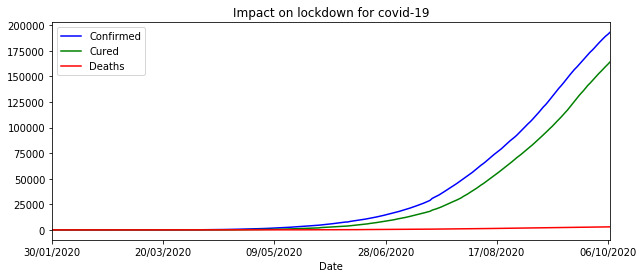

In [6]:
#Create a plot based on day wise to show Confirmed,Cured and Deaths 
n_df = df
n_df = n_df.groupby('Date', sort=False).mean() # group by based on date
n_df = n_df.drop(columns='Sno')  #Removed unnecessery columns

(n_df['Confirmed'].plot.line(figsize = (10,4), legend=True, color = 'blue', use_index = True, title ='Impact on lockdown for covid-19' ),
n_df['Cured'].plot.line(figsize = (10,4), legend=True, color = 'green', use_index = True),
n_df['Deaths'].plot.line(figsize = (10,4), legend=True, color = 'Red', use_index = True))

In [7]:
#Combining required data set to get statistics for state wise
df_sts1 = df_State_Wise_Testing  
df_sts1 = df_sts1.groupby('State').sum() #Group by state 
df_sts1

df_sts2 =  df_State_Wise_Population
df_sts2 = df_sts2[['State','Density','Population']].groupby('State').sum() #Group by state 
df_sts2

df_sts = df
df_sts = df_sts.groupby("State").sum()
df_sts = df_sts.drop(columns=['Sno'])
df_sts['Active'] = df_sts['Confirmed'] - df_sts['Cured'] - df_sts['Deaths']

df_sts = pd.concat([df_sts, df_sts1],axis=1, join='inner')

df_sts['Recovery_Ratio_%'] = round((df_sts['Cured']/df_sts['Confirmed'])*100,1)
df_sts['Active_Ratio_%'] = round((df_sts['Active']/df_sts['Confirmed'])*100,1)
df_sts['Case_Fatality_ratio_%'] = round((df_sts['Deaths']/df_sts['Confirmed'])*100,1)
df_sts['Test_Positive_Ratio_%'] = round((df_sts['Confirmed']/df_sts['TotalSamples'])*100,1)

df_sts = pd.concat([df_sts, df_sts2],axis=1, join='inner')

df_sts = df_sts.sort_values(by='Confirmed',ascending=False)
State_Wise_Statistics = df_sts.sort_values('Active', ascending = False )
State_Wise_Statistics

,Cured,Deaths,Confirmed,Active,TotalSamples,Positive,Recovery_Ratio_%,Active_Ratio_%,Case_Fatality_ratio_%,Test_Positive_Ratio_%,Density,Population
State,,,,,,,,,,,,
Maharashtra,51308834,2307966,74038022,20421222,339006835,44071425.0,69.3,27.6,3.1,21.8,365.0,112374333
Karnataka,19559143,442138,27374481,7373200,229821414,4701197.0,71.5,26.9,1.6,11.9,319.0,61095297
Andhra Pradesh,25801839,292587,32689980,6595554,298472635,3859260.0,78.9,20.2,0.9,11.0,303.0,49577103
Tamil Nadu,30224241,586759,36601887,5790887,389853251,12772604.0,82.6,15.8,1.6,9.4,555.0,72147030
Uttar Pradesh,14382732,304829,19085839,4398278,411987020,2743971.0,75.4,23.0,1.6,4.6,828.0,199812341
Delhi,15548085,471261,18764283,2744937,148365335,6848173.0,82.9,14.6,2.5,12.6,98.0,16787941
West Bengal,10645019,284088,13247151,2318044,153534119,3487431.0,80.4,17.5,2.1,8.6,1029.0,91276115
Kerala,4637086,26908,6970604,2306610,126530925,5622158.0,66.5,33.1,0.4,5.5,859.0,33406061
Assam,6719843,27255,8684022,1936924,161861746,2065991.0,77.4,22.3,0.3,5.4,397.0,31205576


In [8]:
#Creating a unique colour combination for each row and assign it to State_Wise_Statistics dataset
row_count = len(State_Wise_Statistics.axes[0])
np.random.seed(seed=row_count)
cmap=plt.cm.get_cmap('Spectral')

color_dict = pd.Series({k:cmap(np.random.rand()) for k in df_sts.index.unique()})
color_dict.name = 'color_dict'
color_dict

State_Wise_Statistics = pd.merge(State_Wise_Statistics, color_dict, how = 'left', left_on = df_sts.index, right_index=True)
State_Wise_Statistics

,Cured,Deaths,Confirmed,Active,TotalSamples,Positive,Recovery_Ratio_%,Active_Ratio_%,Case_Fatality_ratio_%,Test_Positive_Ratio_%,Density,Population,color_dict
State,,,,,,,,,,,,,
Maharashtra,51308834,2307966,74038022,20421222,339006835,44071425.0,69.3,27.6,3.1,21.8,365.0,112374333,"(0.2800461361014994, 0.6269896193771626, 0.702..."
Karnataka,19559143,442138,27374481,7373200,229821414,4701197.0,71.5,26.9,1.6,11.9,319.0,61095297,"(0.9950019223375625, 0.8246059207996924, 0.499..."
Andhra Pradesh,25801839,292587,32689980,6595554,298472635,3859260.0,78.9,20.2,0.9,11.0,303.0,49577103,"(0.944252210688197, 0.9777008842752788, 0.6620..."
Tamil Nadu,30224241,586759,36601887,5790887,389853251,12772604.0,82.6,15.8,1.6,9.4,555.0,72147030,"(0.2941945405613224, 0.4062283737024224, 0.680..."
Uttar Pradesh,14382732,304829,19085839,4398278,411987020,2743971.0,75.4,23.0,1.6,4.6,828.0,199812341,"(0.5697808535178779, 0.8272202998846598, 0.644..."
Delhi,15548085,471261,18764283,2744937,148365335,6848173.0,82.9,14.6,2.5,12.6,98.0,16787941,"(0.3680123029603999, 0.7251057285659361, 0.661..."
West Bengal,10645019,284088,13247151,2318044,153534119,3487431.0,80.4,17.5,2.1,8.6,1029.0,91276115,"(0.8310649750096117, 0.23844675124951936, 0.30..."
Kerala,4637086,26908,6970604,2306610,126530925,5622158.0,66.5,33.1,0.4,5.5,859.0,33406061,"(0.24682814302191466, 0.4675893886966551, 0.71..."
Assam,6719843,27255,8684022,1936924,161861746,2065991.0,77.4,22.3,0.3,5.4,397.0,31205576,"(0.8838139177239526, 0.9534025374855826, 0.599..."


In [9]:
#Creating Month wise testing Statistics 

df_State_Testing = df_State_Wise_Testing 

df_State_Testing['Month'] = pd.DatetimeIndex(df_State_Testing['Date'],dayfirst=True,).month 
df_State_Testing['Year'] = pd.DatetimeIndex(df_State_Testing['Date'],dayfirst=True,).year
df_State_Testing['YearMonth'] = df_State_Testing['Year'].astype(str)+'-'+df_State_Testing['Month'].astype(str)

table = pd.pivot_table(df_State_Testing, values='TotalSamples', index=['YearMonth'],
                    columns=['State'], aggfunc=np.sum)
df_State_Testing = table.fillna(0)

df_State_Testing.sort_index(ascending=False)

State,Andaman and Nicobar Islands,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chandigarh,Chhattisgarh,Dadra and Nagar Haveli and Daman and Diu,Delhi,Goa,...,Puducherry,Punjab,Rajasthan,Sikkim,Tamil Nadu,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal
YearMonth,,,,,,,,,,,,,,,,,,,,,
2020-9,1418271.0,143345158.0,6332338.0,84228128.0,157148977.0,1619986.0,25297099.0,1606117.0,68841611.0,6871777.0,...,3692034.0,43610400.0,81815834.0,1375694.0,183053990.0,67042651.0,10068361.0,236747961.0,16633577.0,77493556.0
2020-8,889807.0,88689222.0,3901812.0,51503857.0,54096607.0,666528.0,13445035.0,1497849.0,40535918.0,5127596.0,...,1757977.0,24586254.0,59666436.0,974674.0,115434562.0,24765958.0,6663827.0,111492454.0,8240087.0,41681715.0
2020-7,607579.0,40729796.0,1296620.0,18794162.0,11129288.0,325319.0,7237236.0,1047685.0,24551654.0,3121066.0,...,891940.0,13520674.0,35954892.0,471388.0,57124756.0,6981058.0,3233047.0,42883041.0,3446465.0,20931361.0
2020-6,351040.0,17941804.0,468969.0,6212049.0,4112686.0,178717.0,3366037.0,579383.0,9972589.0,1306691.0,...,335736.0,5836574.0,18672249.0,198361.0,23445380.0,924132.0,1409725.0,14670740.0,1459303.0,10482353.0
2020-5,106231.0,6947640.0,110479.0,1038938.0,1322890.0,86508.0,956931.0,191404.0,3921639.0,249656.0,...,158101.0,1603216.0,7309683.0,31876.0,9672303.0,23388.0,433956.0,5366214.0,462667.0,2792015.0
2020-4,6930.0,819015.0,6271.0,84612.0,273246.0,11634.0,188583.0,15271.0,541924.0,17113.0,...,22360.0,199423.0,1302400.0,0.0,1122260.0,53303.0,7656.0,826610.0,82759.0,153119.0


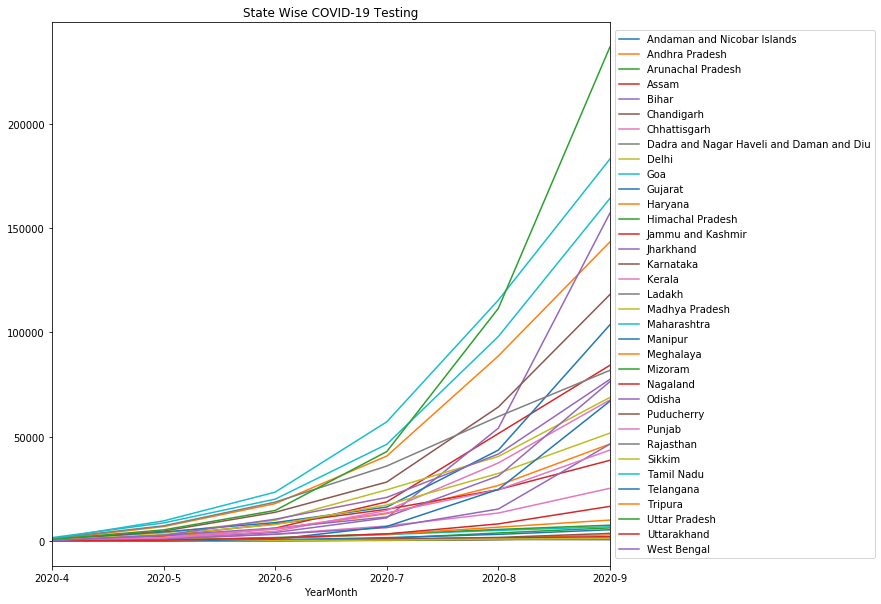

In [10]:
#Creating line chart for state wise testing
(df_State_Testing/1000).sort_index(ascending=True).plot.line(figsize=(10, 10),title = "State Wise COVID-19 Testing" ,
                                                legend=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

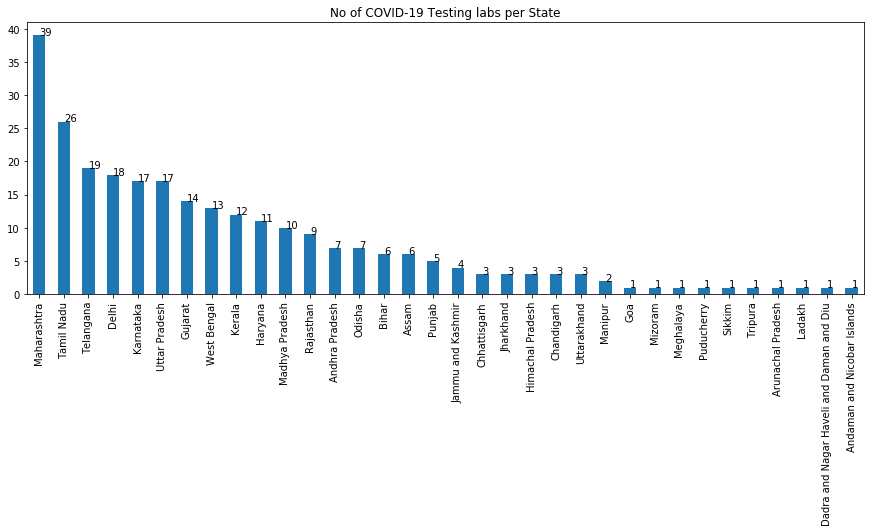

In [11]:
#Creating bar chart based on ICMR testing labs for individual state wise
lab_counts = df_ICMR_Testing_Labs.State.value_counts()

lab_counts.plot.bar(rot=90, title='No of COVID-19 Testing labs per State', figsize=(15, 5))
for index, value in enumerate(lab_counts):
    plt.text(index, value, str(value))


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f98b0b1c810>,
      dtype=object)

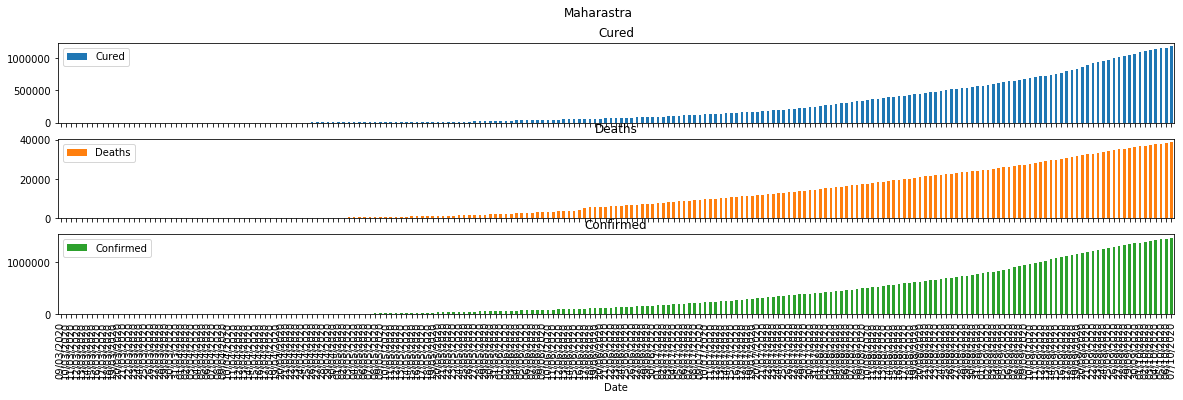

In [12]:
#Creating bar chat for most effected state Maharashtra
MR_Sts = df.query('State == "Maharashtra"')  #get data only for Maharashtra state 
MR_Sts = MR_Sts.drop(columns=['Sno','Time','ConfirmedIndianNational','ConfirmedForeignNational','State'])
MR_Sts = MR_Sts.set_index('Date')

MR_Sts.plot.bar(figsize = (20,5), legend=True, title = 'Maharastra', subplots = 'True')

In [13]:
#Create defination to get the scatter plot for specifed columns as x and y axis
def create_scatter_plot(df,X_Axis,Y_Axis,Colour_column,Size):
    
    '''
    INPUT
    df - pandas dataframe 
    X_Axis - X axis column name in df
    Y_Axis - Y axis column name in df
    Colour_column - colour column name in df
    Size - size of the cases i.e., Lakhs,Millions,Crores
    
    OUTPUT
    Scatter plot figure
    
    Functionality of the procedure:
    a)sort the values for x axis
    b)Assign the values for x and y
    c)Based on size conver the values to M,L,C for size of bubble
    d)create legend to the list for each colour of bubble
    e)create scatter command to create the plot
    
    '''
    
    df_sts = df.sort_values(X_Axis)  #sort values related to x-axes

    y = df_sts[Y_Axis]
    x = df_sts[X_Axis]
    
    if Size.lower() == 'millions':
        x=[ str(round(x/1000000))+'M' for x in df_sts[X_Axis].values ] #Converting the x values to perticular number
    if Size.lower() == 'lakhs':
        x=[ str(round(x/100000))+'L' for x in df_sts[X_Axis].values ] #Converting the x values to perticular number
    if Size.lower() == "crores":
        x=[ str(round(x/10000000))+'C' for x in df_sts.Confirmed.values ] #Converting the x values to perticular number
    

    c = df_sts[Colour_column]
    s = np.abs(df_sts.Population)/10000000  # creating for buble size

    plt.xlabel(X_Axis+ ' Cases')
    plt.ylabel('Population Density per sqkm')
    plt.title('State Population Density Analysis')
    plt.style.use('seaborn')

    plt.ylim(-50,1350)

    #Legend
    Country_list = list(df_sts.index)
    bouble_color_list = list(df_sts[Colour_column])
    a = []
    for i in range(0,len(df_sts.index)):
        a.append(mpatches.Patch(color=bouble_color_list[i],
                          alpha = 0.5,
                          label = Country_list[i]))

    plt.legend(handles=a, loc=(1.05,0))


    fig = plt.scatter(x,y, cmap='Spectral', s=s*100, c=c, alpha= 0.5, edgecolors='none')
    
    return fig

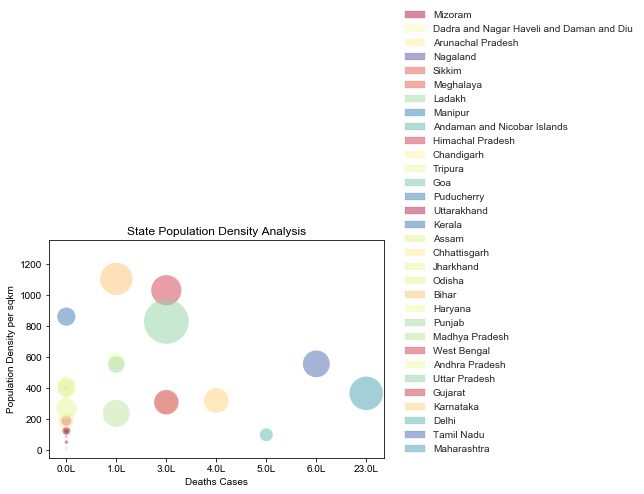

In [14]:
create_scatter_plot(State_Wise_Statistics,'Deaths','Density','color_dict','lakhs')

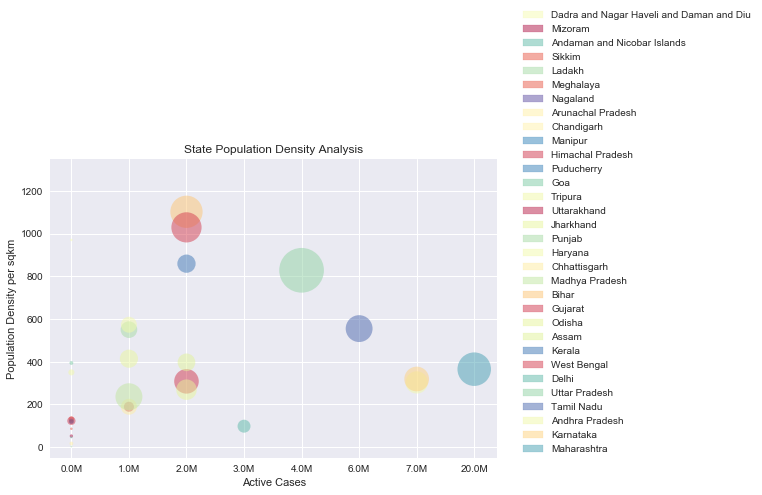

In [15]:
create_scatter_plot(State_Wise_Statistics,'Active','Density','color_dict','Millions')

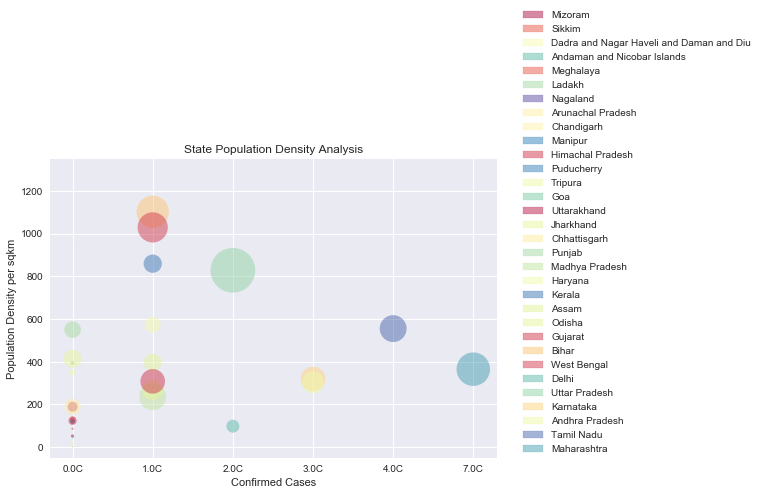

In [16]:
create_scatter_plot(State_Wise_Statistics,'Confirmed','Density','color_dict','crores')